# EDA

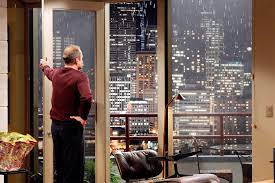

In [1]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Data Cleaning

## 1. Loading the Data

In [2]:
df = pd.read_csv('./data/eda.csv')
df.head()

house_id  price_date  selling_price  bedrooms  bathrooms  sqft_living  \
0  7129300520  2014-10-13     221900.000     3.000      1.000     1180.000   
1  6414100192  2014-12-09     538000.000     3.000      2.250     2570.000   
2  5631500400  2015-02-25     180000.000     2.000      1.000      770.000   
3  2487200875  2014-12-09     604000.000     4.000      3.000     1960.000   
4  1954400510  2015-02-18     510000.000     3.000      2.000     1680.000   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0  5650.000   1.000         NaN 0.000  ...      7    1180.000          0.000   
1  7242.000   2.000       0.000 0.000  ...      7    2170.000        400.000   
2 10000.000   1.000       0.000 0.000  ...      6     770.000          0.000   
3  5000.000   1.000       0.000 0.000  ...      7    1050.000        910.000   
4  8080.000   1.000       0.000 0.000  ...      8    1680.000          0.000   

   yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  
0      1955         0.000    98178 47.511 -122.257       1340.000    5650.000  
1      1951     19910.000    98125 47.721 -122.319       1690.000    7639.000  
2      1933           NaN    98028 47.738 -122.233       2720.000    8062.000  
3      1965         0.000    98136 47.521 -122.393       1360.000    5000.000  
4      1987         0.000    98074 47.617 -122.045       1800.000    7503.000  

[5 rows x 21 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   house_id       21597 non-null  int64  
 1   price_date     21597 non-null  object 
 2   selling_price  21597 non-null  float64
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  float64
 8   waterfront     19206 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21145 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17749 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## 2. Handling Missing Values

In [4]:
#Checking missing values
missing_values = df.isnull().sum()
missing_values

house_id            0
price_date          0
selling_price       0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [5]:
# modifying relevant column's value from NaN with 0
df['yr_renovated'].fillna(0, inplace=True)
df['sqft_basement'].fillna(0, inplace=True)
df['view'].fillna(0, inplace=True)
df['waterfront'].fillna(0, inplace=True)

# Convert 'price_date' to datetime format
df['price_date'] = pd.to_datetime(df['price_date'])

# Ensure numerical columns are in the correct format
# Given that the data types seem already correct, this step might be unnecessary
# but let's ensure consistency
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')
df['sqft_living'] = pd.to_numeric(df['sqft_living'], errors='coerce')
df['sqft_lot'] = pd.to_numeric(df['sqft_lot'], errors='coerce')


In [6]:
df.head()

house_id price_date  selling_price  bedrooms  bathrooms  sqft_living  \
0  7129300520 2014-10-13     221900.000     3.000      1.000     1180.000   
1  6414100192 2014-12-09     538000.000     3.000      2.250     2570.000   
2  5631500400 2015-02-25     180000.000     2.000      1.000      770.000   
3  2487200875 2014-12-09     604000.000     4.000      3.000     1960.000   
4  1954400510 2015-02-18     510000.000     3.000      2.000     1680.000   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0  5650.000   1.000       0.000 0.000  ...      7    1180.000          0.000   
1  7242.000   2.000       0.000 0.000  ...      7    2170.000        400.000   
2 10000.000   1.000       0.000 0.000  ...      6     770.000          0.000   
3  5000.000   1.000       0.000 0.000  ...      7    1050.000        910.000   
4  8080.000   1.000       0.000 0.000  ...      8    1680.000          0.000   

   yr_built  yr_renovated  zipcode    lat     long  sqft_living15  sqft_lot15  
0      1955         0.000    98178 47.511 -122.257       1340.000    5650.000  
1      1951     19910.000    98125 47.721 -122.319       1690.000    7639.000  
2      1933         0.000    98028 47.738 -122.233       2720.000    8062.000  
3      1965         0.000    98136 47.521 -122.393       1360.000    5000.000  
4      1987         0.000    98074 47.617 -122.045       1800.000    7503.000  

[5 rows x 21 columns]

## 3. Creating a new Feature


In [7]:
# Create new feature: price per square foot
df['price_per_sqft'] = df['selling_price'] / df['sqft_living']

# Exploratory Data Analysis

# 1. Descriptive Statistics

In [8]:
# Display summary statistics
print(df.describe())



            house_id                     price_date  selling_price  bedrooms  \
count      21597.000                          21597      21597.000 21597.000   
mean  4580474287.771  2014-10-29 04:20:38.171968512     540296.574     3.373   
min      1000102.000            2014-05-02 00:00:00      78000.000     1.000   
25%   2123049175.000            2014-07-22 00:00:00     322000.000     3.000   
50%   3904930410.000            2014-10-16 00:00:00     450000.000     3.000   
75%   7308900490.000            2015-02-17 00:00:00     645000.000     4.000   
max   9900000190.000            2015-05-27 00:00:00    7700000.000    33.000   
std   2876735715.748                            NaN     367368.140     0.926   

       bathrooms  sqft_living    sqft_lot    floors  waterfront      view  \
count  21597.000    21597.000   21597.000 21597.000   21597.000 21597.000   
mean       2.116     2080.322   15099.409     1.494       0.007     0.233   
min        0.500      370.000     520.000     1.

In [9]:
# Display the count of unique values for categorical variables
print(df['waterfront'].value_counts())
print(df['view'].value_counts())

waterfront
0.000    21451
1.000      146
Name: count, dtype: int64
view
0.000    19485
2.000      957
3.000      508
1.000      330
4.000      317
Name: count, dtype: int64


# 2. Data Visualization


## Visualizing Distribution

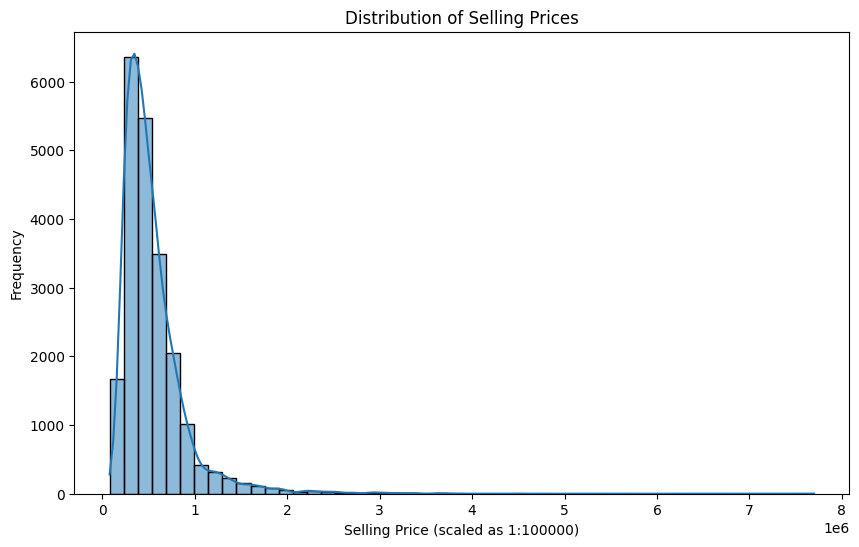

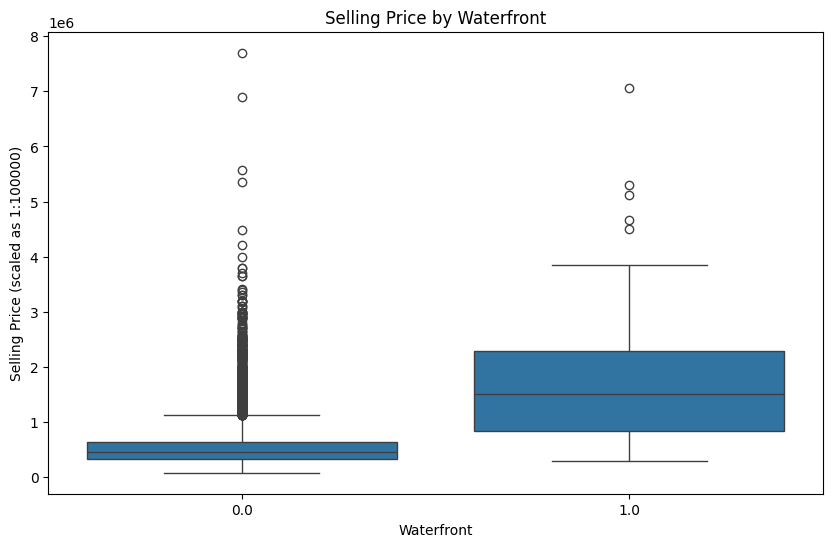

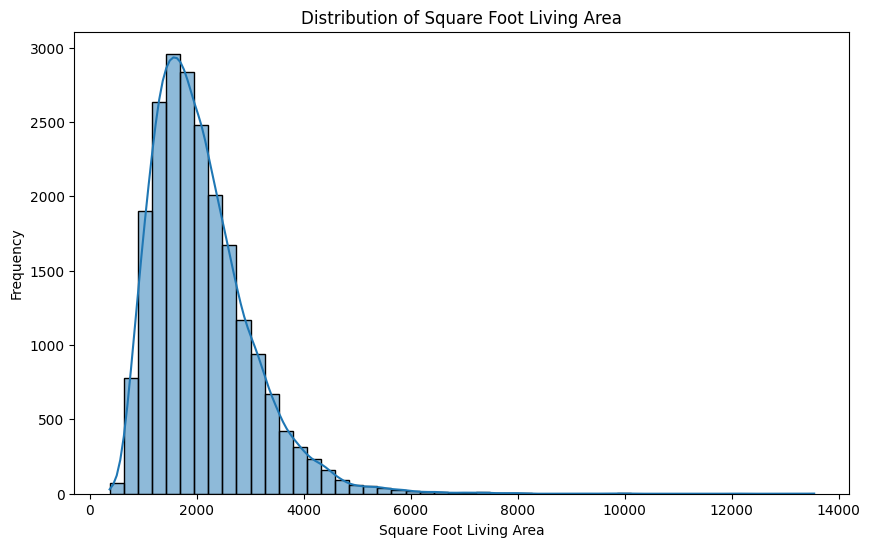

In [10]:
#import matplotlib.ticker as ticker

# Histogram for selling_price
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=50, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price (scaled as 1:100000)')
plt.ylabel('Frequency')
plt.show()

# Box plot for selling_price by waterfront
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='selling_price', data=df)
plt.title('Selling Price by Waterfront')
plt.xlabel('Waterfront')
plt.ylabel('Selling Price (scaled as 1:100000)')
plt.show()

# Histogram for sqft_living
plt.figure(figsize=(10, 6))
sns.histplot(df['sqft_living'], bins=50, kde=True)
plt.title('Distribution of Square Foot Living Area')
plt.xlabel('Square Foot Living Area')
plt.ylabel('Frequency')
plt.show()


### Visualizing Relationships

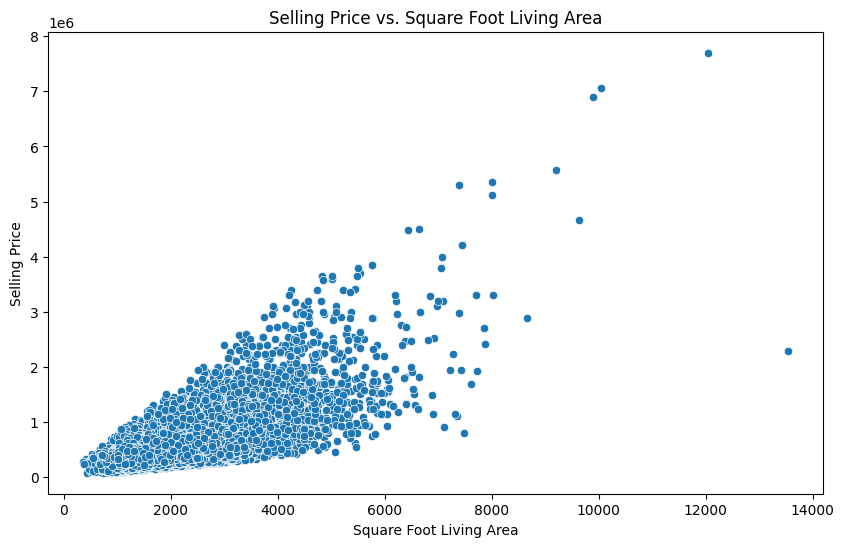

In [11]:
# Scatter plot for selling_price vs. sqft_living
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='selling_price', data=df)
plt.title('Selling Price vs. Square Foot Living Area')
plt.xlabel('Square Foot Living Area')
plt.ylabel('Selling Price')
plt.show()

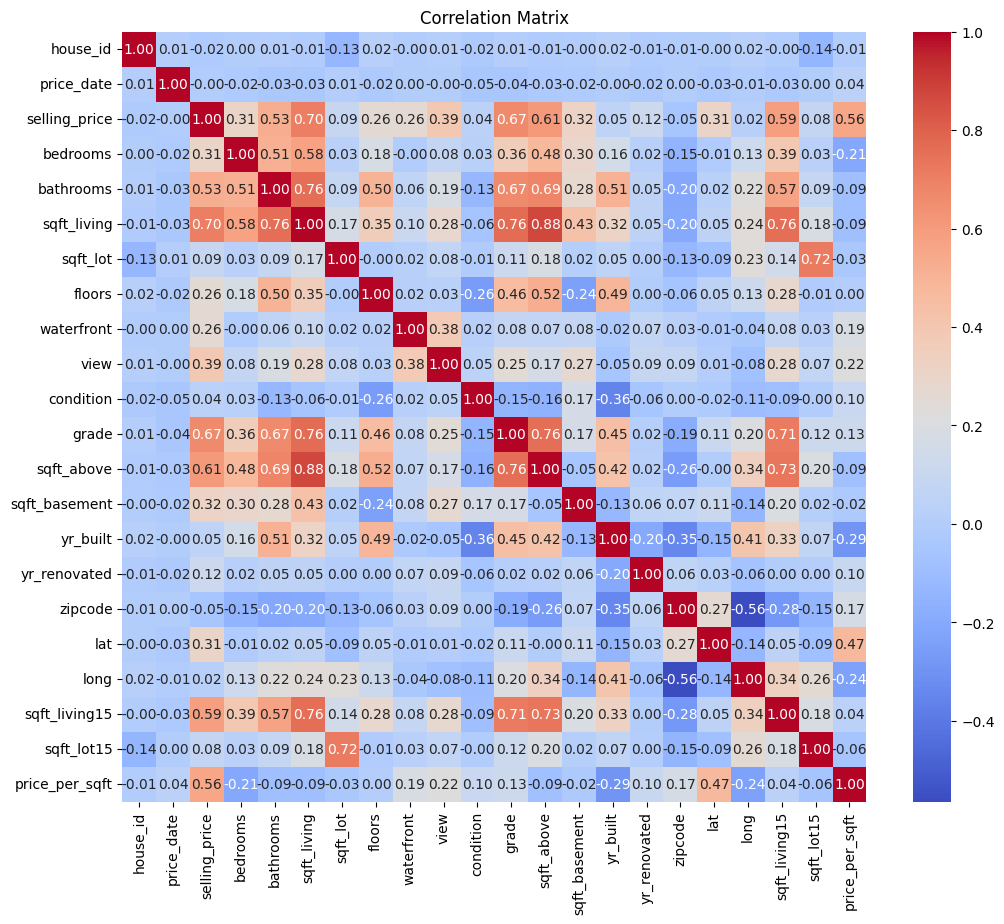

In [12]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Geographical Patterns

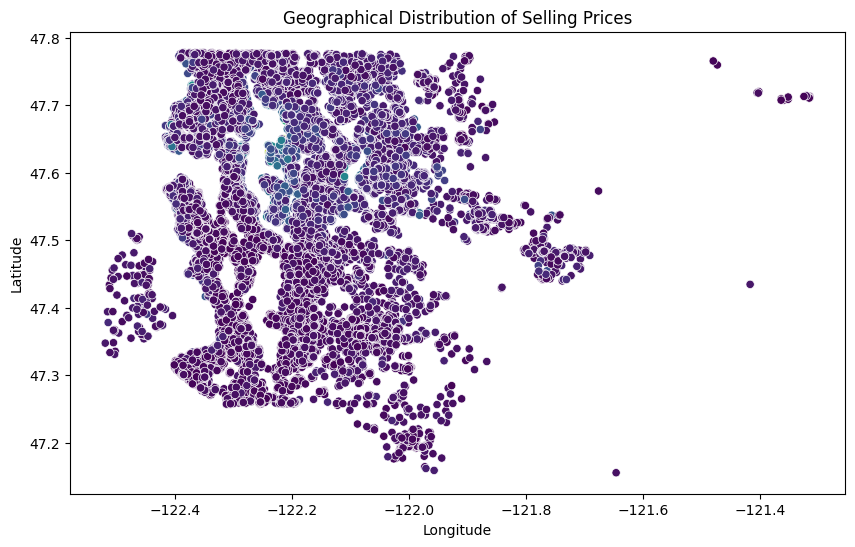

In [13]:
# Scatter plot for latitude and longitude, colored by price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='long', y='lat', hue='selling_price', palette='viridis', data=df, legend=False)
plt.title('Geographical Distribution of Selling Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [14]:
import plotly.express as px


 Source for King County zipcodes - https://www.unitedstateszipcodes.org/wa/

In [15]:
# Filter data for King County based on zip codes
king_county_zipcodes = [98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, 98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042, 98045, 98047, 98050, 98051, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070, 98072, 98074, 98075, 98077, 98092, 98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199]
df = df[df['zipcode'].isin(king_county_zipcodes)]

# Add a column for city/country classification within King County
# Example city and country zip codes
city_zipcodes = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155, 98166, 98168, 98177, 98178, 98188, 98198, 98199]
df['location_type'] = df['zipcode'].apply(lambda x: 'City' if x in city_zipcodes else 'Country')

# Plotly scatter mapbox for geographical insights
fig = px.scatter_mapbox(df,
                        lat="lat",
                        lon="long",
                        color="location_type",
                        size="selling_price",
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15,
                        zoom=10,
                        mapbox_style="carto-positron",
                        title="Geographical Distribution of Properties in King County")

# Add additional insight: Highlight waterfront properties
fig.add_trace(
    px.scatter_mapbox(df[df['waterfront'] == 1],
                      lat="lat",
                      lon="long",
                      size="selling_price",
                      size_max=15,
                      zoom=10,
                      mapbox_style="carto-positron",
                      title="Waterfront Properties").data[0]
)

# Show plot
fig.show()

In [40]:
import geojson
avg_latitude = df['lat'].mean()
avg_longitude = df['long'].mean()

url_geojson = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json"
fig = px.choropleth_mapbox(df, 
                           geojson=url_geojson, 
                           locations='zipcode', featureidkey='properties.ZCTA5CE10',
                           color='location_type',
                           mapbox_style="open-street-map",
                           zoom=8, center={"lat": avg_latitude, "lon": avg_longitude},
                           opacity=0.5,
                           height=400,
                           width=600, 
                          )
# instead of df_import you can use ur filtered dataframe and highlight or color acc to your features of interest
fig2 = px.scatter_mapbox(df, lat="lat", lon="long", zoom=3, height=400, width= 600,  hover_data='selling_price',mapbox_style='open-street-map')

for trace in fig2.data:
    fig.add_trace(trace)
fig.show()

# Client-Specific Analysis for William Rodriguez

### William Rodriguez is interested in:

- A country house (best timing & non-renovated).
- A city house (fast & central location).


## Country House Selection
- Filter non-renovated houses in country areas.
- Consider the best timing.

In [16]:
# Filter non-renovated houses in country areas
country_houses = df[(df['location_type'] == 'Country') & (df['yr_renovated'] == 0)]

# Sort by the most recent price_date to get the best timing
country_houses = country_houses.sort_values(by='price_date', ascending=False)

# Display the top 5 options
print("Top 5 Country Houses:")
print(country_houses.head(5))

Top 5 Country Houses:
         house_id price_date  selling_price  bedrooms  bathrooms  sqft_living  \
5632   7923600250 2015-05-15     450000.000     5.000      2.000     1870.000   
21434  8562790720 2015-05-14     749950.000     4.000      3.500     2630.000   
11548  6752600320 2015-05-14     360000.000     4.000      2.500     2020.000   
12623  4166600610 2015-05-14     335000.000     3.000      2.000     1410.000   
20456  5057100110 2015-05-14     479349.000     5.000      3.000     3223.000   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
5632   7344.000   1.500       0.000 0.000  ...          0.000      1960   
21434  3757.000   2.000       0.000 0.000  ...        430.000      2008   
11548  7289.000   2.000       0.000 0.000  ...          0.000      1994   
12623 44866.000   1.000       0.000 0.000  ...          0.000      1985   
20456  6371.000   2.000       0.000 0.000  ...          0.000      2014   

       yr_renovated  zipcode    lat     

## City House Selection
- Filter houses in city areas.
- Consider fast and central locations.

In [17]:
# Filter houses in city areas
city_houses = df[df['location_type'] == 'City']

# Sort by the most recent price_date to get fast and central locations
city_houses = city_houses.sort_values(by='price_date', ascending=False)

# Display the top 5 options
print("Top 5 City Houses:")
print(city_houses.head(5))

Top 5 City Houses:
         house_id price_date  selling_price  bedrooms  bathrooms  sqft_living  \
16580  9106000005 2015-05-27    1310000.000     4.000      2.250     3750.000   
13040  5101400871 2015-05-24     445500.000     2.000      1.750     1390.000   
7891   1422700040 2015-05-14     183000.000     3.000      1.000     1170.000   
6191   9178601660 2015-05-14    1700000.000     5.000      3.000     3320.000   
15797  7129304540 2015-05-14     440000.000     5.000      2.000     1430.000   

       sqft_lot  floors  waterfront  view  ...  sqft_basement  yr_built  \
16580  5000.000   2.000       0.000 0.000  ...       1310.000      1924   
13040  6670.000   1.000       0.000 0.000  ...        670.000      1941   
7891   7320.000   1.000       0.000 0.000  ...          0.000      1962   
6191   5354.000   2.000       0.000 0.000  ...          0.000      2004   
15797  5600.000   1.500       0.000 0.000  ...          0.000      1947   

       yr_renovated  zipcode    lat     lon

## Recommendation:

In [18]:
# Display the summary of top options
top_country_houses = country_houses.head()
top_city_houses = city_houses.head()

# Function to summarize options
def summarize_options(houses, house_type):
    print(f"Top {house_type} Houses:")
    for index, house in houses.iterrows():
        print(f"House ID: {house['house_id']}")
        print(f"Price: ${house['selling_price']}")
        print(f"Location Type: {house['location_type']}")
        print(f"Bedrooms: {house['bedrooms']}, Bathrooms: {house['bathrooms']}")
        print(f"Square Foot Living: {house['sqft_living']}, Lot Size: {house['sqft_lot']}")
        print(f"Waterfront: {house['waterfront']}, View: {house['view']}")
        print(f"Year Built: {house['yr_built']}, Year Renovated: {house['yr_renovated']}")
        print(f"Price Date: {house['price_date'].date()}")
        print("----------")

# Summarize country houses
summarize_options(top_country_houses, "Country")

# Summarize city houses
summarize_options(top_city_houses, "City")

Top Country Houses:
House ID: 7923600250
Price: $450000.0
Location Type: Country
Bedrooms: 5.0, Bathrooms: 2.0
Square Foot Living: 1870.0, Lot Size: 7344.0
Waterfront: 0.0, View: 0.0
Year Built: 1960, Year Renovated: 0.0
Price Date: 2015-05-15
----------
House ID: 8562790720
Price: $749950.0
Location Type: Country
Bedrooms: 4.0, Bathrooms: 3.5
Square Foot Living: 2630.0, Lot Size: 3757.0
Waterfront: 0.0, View: 0.0
Year Built: 2008, Year Renovated: 0.0
Price Date: 2015-05-14
----------
House ID: 6752600320
Price: $360000.0
Location Type: Country
Bedrooms: 4.0, Bathrooms: 2.5
Square Foot Living: 2020.0, Lot Size: 7289.0
Waterfront: 0.0, View: 0.0
Year Built: 1994, Year Renovated: 0.0
Price Date: 2015-05-14
----------
House ID: 4166600610
Price: $335000.0
Location Type: Country
Bedrooms: 3.0, Bathrooms: 2.0
Square Foot Living: 1410.0, Lot Size: 44866.0
Waterfront: 0.0, View: 0.0
Year Built: 1985, Year Renovated: 0.0
Price Date: 2015-05-14
----------
House ID: 5057100110
Price: $479349.0
L

## Graphical Recommendations

In [43]:
# Filter non-renovated houses in country areas
country_houses = df[(df['location_type'] == 'Country') & (df['yr_renovated'] == 0)].sort_values(by='price_date', ascending=False).head(5)

# Calculate the average latitude and longitude for the map center
avg_latitude = country_houses['lat'].mean()
avg_longitude = country_houses['long'].mean()

# URL for the geojson file
url_geojson = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json"

# Create a scatter mapbox plot
fig = px.scatter_mapbox(country_houses, 
                        lat="lat", 
                        lon="long", 
                        hover_name="house_id",
                        hover_data={"selling_price": True, "price_date": True},
                        color="selling_price", 
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size="selling_price",
                        size_max=15,
                        zoom=10,
                        mapbox_style="open-street-map",
                        title="Top 5 Country Houses (Non-Renovated)"
                       )

# Show the plot
fig.show()

In [44]:
# Filter houses in city areas
city_houses = df[df['location_type'] == 'City'].sort_values(by='price_date', ascending=False).head(5)

# Calculate the average latitude and longitude for the map center
avg_latitude = city_houses['lat'].mean()
avg_longitude = city_houses['long'].mean()

# URL for the geojson file
url_geojson = "https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json"

# Create a scatter mapbox plot
fig = px.scatter_mapbox(city_houses, 
                        lat="lat", 
                        lon="long", 
                        hover_name="house_id",
                        hover_data={"selling_price": True, "price_date": True},
                        color="selling_price", 
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size="selling_price",
                        size_max=15,
                        zoom=10,
                        mapbox_style="open-street-map",
                        title="Top 5 City Houses (Fast & Central Location)"
                       )

# Show the plot
fig.show()

In [48]:
import plotly.graph_objects as go

# Filter non-renovated houses in country areas
country_houses = df[(df['location_type'] == 'Country') & (df['yr_renovated'] == 0)].sort_values(by='price_date', ascending=False).head(5)

# Filter houses in city areas
city_houses = df[df['location_type'] == 'City'].sort_values(by='price_date', ascending=False).head(5)

# Calculate the average latitude and longitude for the map center
avg_latitude = df['lat'].mean()
avg_longitude = df['long'].mean()

# Create scatter mapbox plots for city and country houses
fig = go.Figure()

# Add country houses layer
fig.add_trace(go.Scattermapbox(
    lat=country_houses['lat'],
    lon=country_houses['long'],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=country_houses['selling_price'] / 50000,  # Adjust size for better visualization
        color='blue',
        opacity=0.7
    ),
    text=country_houses.apply(lambda row: f"House ID: {row['house_id']}<br>Price: ${row['selling_price']:,}<br>Date: {row['price_date'].date()}", axis=1),
    name='Country Houses'
))

# Add city houses layer
fig.add_trace(go.Scattermapbox(
    lat=city_houses['lat'],
    lon=city_houses['long'],
    mode='markers',
    marker=go.scattermapbox.Marker(
        size=city_houses['selling_price'] / 50000,  # Adjust size for better visualization
        color='red',
        opacity=0.7
    ),
    text=city_houses.apply(lambda row: f"House ID: {row['house_id']}<br>Price: ${row['selling_price']:,}<br>Date: {row['price_date'].date()}", axis=1),
    name='City Houses'
))

# Update layout for map
fig.update_layout(
    mapbox=dict(
        style="open-street-map",
        center=dict(lat=avg_latitude, lon=avg_longitude),
        zoom=10,
    ),
    title="Top 5 City and Country Houses",
    showlegend=True
)

# Add dropdown menu
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["visible", [True, False]],
                    label="Country Houses",
                    method="restyle"
                ),
                dict(
                    args=["visible", [False, True]],
                    label="City Houses",
                    method="restyle"
                ),
                dict(
                    args=["visible", [True, True]],
                    label="Both",
                    method="restyle"
                )
            ]),
            direction="down",
            showactive=True,
        ),
    ]
)

# Show the plot
fig.show()
